Framingham Heart study dataset
Dataset is downloaded from https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [67]:
# in this dataset, we are trying to predict the TenYearCHD(Coronary Heart Disease) , person likely to develop CHD or not
df1 = pd.read_csv('framingham.csv')


In [4]:
df1.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [69]:
df1.shape # (4240, 16)
#df1.columns

(4240, 16)

In [70]:
df1['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

# Dataset seems to be a imbalanced dataset

In [71]:
# Only 18%  of data are having values 1, this shows the dataset is Imbalanced dataset

# All the columns are already pre-processed and in numeric format, so no need to cleaning the data

In [72]:
# Finding columns with NAs
col_with_nulls =[]
for col_name in df1.columns:
    if df1[col_name].isnull().sum()> 0:
        col_with_nulls.append(col_name) 
        print (col_name,df1[col_name].isnull().sum())

education 105
cigsPerDay 29
BPMeds 53
totChol 50
BMI 19
heartRate 1
glucose 388


In [8]:
df1['glucose'].value_counts()

75.0     193
77.0     167
73.0     156
80.0     153
70.0     152
        ... 
297.0      1
167.0      1
202.0      1
235.0      1
274.0      1
Name: glucose, Length: 143, dtype: int64

In [73]:
# Filling NAs for the above columns       
# For the 'Education' column having null value

df1['education'].fillna(1,inplace=True) # Since 1 is the most people educational level , filled NAs with 1
df1['cigsPerDay'].fillna(0,inplace=True) # if the cigsperday is NA, then filling that with 0(assuming that they wont smoke)
df1['BPMeds'].fillna(df1['BPMeds'].value_counts().sort_values(ascending=False).index[0],inplace=True) # if BPMeds is NA, so assum those people wont take BP Medicine
# df1['BPMeds'].value_counts().sort_values(ascending=False).index[0] -> gives the element with most values
df1['totChol'].fillna(df1['totChol'].median(),inplace=True) # filling the missing totchol with median value
df1['BMI'].fillna(df1['BMI'].median(),inplace=True) # filling the missing BMI with median value
df1['heartRate'].fillna(df1['heartRate'].value_counts().sort_values(ascending=False).index[0],inplace=True) # filling the missing BMI with median value
df1['glucose'].fillna(df1['glucose'].median(),inplace=True) # filling the missing BMI with median value


In [83]:
# Finding columns with NAs
col_with_nulls =[]
for col_name in df1.columns:
    if df1[col_name].isnull().sum()> 0:
        col_with_nulls.append(col_name) 
        print (col_name,df1[col_name].isnull().sum())

# Now, there are no NAs in the dataset


# Balancing the dataset

In [84]:
y = df1['TenYearCHD']
X = df1.drop(['TenYearCHD'],axis= 1)

In [85]:
from imblearn.combine import SMOTETomek

In [86]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,y)

In [95]:
y_res = pd.DataFrame(y_res,columns=['TenYearCHD'])

In [96]:
X_res.shape,y_res.shape

((7132, 15), (7132, 1))

In [97]:
# Merging the data after balancing
df2 = pd.concat([y_res,X_res],axis=1)

In [99]:
df2.shape

(7132, 16)

In [100]:
df2['TenYearCHD'].value_counts()

1    3566
0    3566
Name: TenYearCHD, dtype: int64

# Feature Selection
sns.heatmap(df1.corr(),annot=True)

# Running OLS Regression Results to identify Important features

In [101]:
#using statsmodels

est = sm.OLS(df2['TenYearCHD'],df2.drop(['TenYearCHD'],axis= 1))
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             TenYearCHD   R-squared (uncentered):                   0.575
Model:                            OLS   Adj. R-squared (uncentered):              0.574
Method:                 Least Squares   F-statistic:                              642.5
Date:                Sat, 21 Nov 2020   Prob (F-statistic):                        0.00
Time:                        16:05:09   Log-Likelihood:                         -4594.8
No. Observations:                7132   AIC:                                      9220.
Df Residuals:                    7117   BIC:                                      9323.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
male               -0.0977      0.012     -7.916      0.000      -0.122      -0.073
age                 0.0109      0.001     15.241      0.000       0.009       0.012
education          -0.0271      0.006     -4.781      0.000      -0.038      -0.016
currentSmoker      -0.2457      0.018    -13.799      0.000      -0.281      -0.211
cigsPerDay          0.0145      0.001     19.085      0.000       0.013       0.016
BPMeds              0.1418      0.032      4.486      0.000       0.080       0.204
prevalentStroke    -0.1549      0.097     -1.602      0.109      -0.344       0.035
prevalentHyp       -0.0438      0.015     -2.883      0.004      -0.074      -0.014
diabetes           -0.0238      0.047     -0.504      0.615      -0.116       0.069
totChol            -0.0002      0.000     -1.783      0.075      -0.000    2.22e-05
sysBP               0.0030      0.000      6.281      0.000       0.002       0.004
diaBP               0.0004      0.001      0.512      0.609      -0.001       0.002
BMI                -0.0059      0.001     -4.111      0.000      -0.009      -0.003
heartRate          -0.0038      0.000     -8.195      0.000      -0.005      -0.003
glucose             0.0009      0.000      3.426      0.001       0.000       0.001
==============================================================================
Omnibus:                    42037.749   Durbin-Watson:                   0.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              683.486
Skew:                          -0.017   Prob(JB):                    3.83e-149
Kurtosis:                       1.484   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

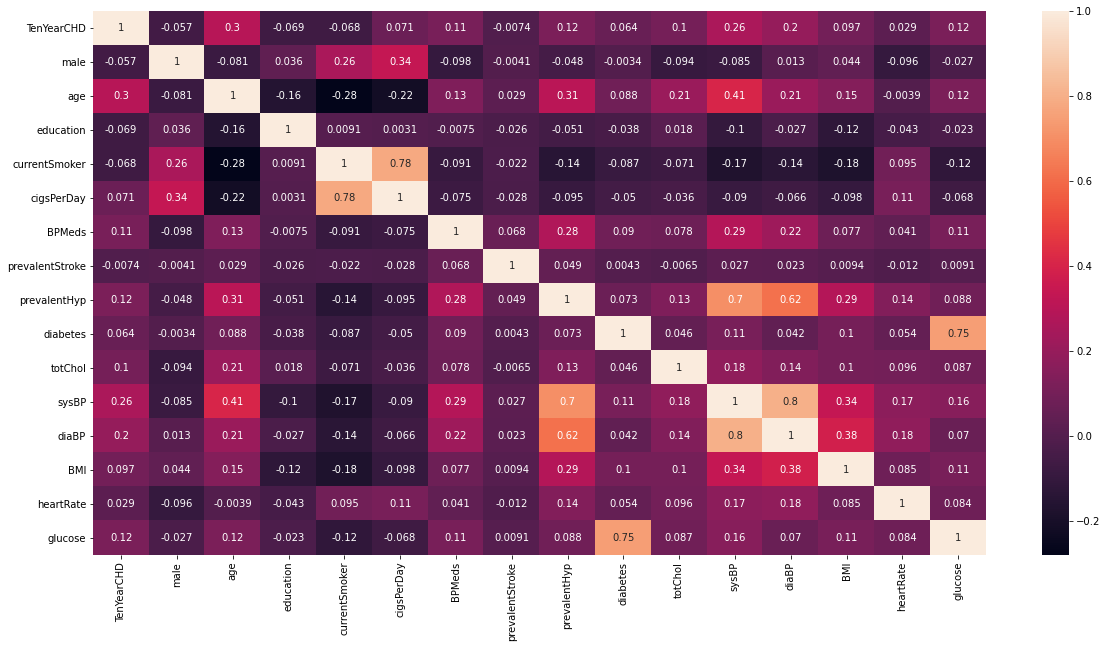

In [102]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(),annot=True)

In [104]:
# Based on OLS regression results and co-relation matrix, selecting only below columns for the model
df3 = df2[['TenYearCHD', 'male', 'age', 'cigsPerDay','BPMeds', 'prevalentHyp', 'totChol','sysBP', 'BMI', 'heartRate', 'glucose']]

# Based on OLS Regression Results, For 95% confidence, the columns p_value < alpha , we are removing those columns for the model
# Columns like Education,CurrentSmoker,prevalentStroke,totChol,glucose can be removd from the model as their 'p>[t]' values are > 0.05

In [105]:
df3.columns

Index(['TenYearCHD', 'male', 'age', 'cigsPerDay', 'BPMeds', 'prevalentHyp',
       'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

# Feature Scaling (Standard Scaler)
Scaling needs to be performed on this dataset as the columns('totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate') are in different units of measurements

model = LogisticRegression()
model.fit(X, y)
predicted_classes = model.predict(X)
accuracy = accuracy_score(y.flatten(),predicted_classes)
parameters = model.coef_

In [106]:
scaler= StandardScaler()
scaled_X_data = scaler.fit_transform(df3[['male', 'age', 'cigsPerDay','BPMeds', 'prevalentHyp', 'totChol','sysBP', 'BMI', 'heartRate', 'glucose']])


In [107]:
scaled_X_data = pd.DataFrame(scaled_X_data,columns= ['male', 'age', 'cigsPerDay','BPMeds', 'prevalentHyp', 'totChol','sysBP', 'BMI', 'heartRate', 'glucose'] )

In [108]:
scaled_X_data.head()

,male,age,cigsPerDay,BPMeds,prevalentHyp,totChol,sysBP,BMI,heartRate,glucose
0,1.270201,-1.491159,-0.794863,-0.235504,-0.709041,-0.999939,-1.290540,0.229956,0.339352,-0.232487
1,-0.787277,-0.635582,-0.794863,-0.235504,-0.709041,0.232920,-0.656542,0.673551,1.641140,-0.265120
2,1.270201,-0.391131,0.876779,-0.235504,-0.709041,0.120842,-0.381809,-0.180873,-0.094578,-0.460918
3,-0.787277,1.197798,1.712600,-0.235504,1.410356,-0.327470,0.569189,0.635745,-0.962437,0.615971
4,-0.787277,-0.635582,1.127525,-0.235504,-0.709041,1.017466,-0.276142,-0.745448,0.773281,0.028577


In [109]:
scaled_X_data.isnull().sum()

male            0
age             0
cigsPerDay      0
BPMeds          0
prevalentHyp    0
totChol         0
sysBP           0
BMI             0
heartRate       0
glucose         0
dtype: int64

In [115]:
scaled_X_data.shape,scaled_X_data.columns


((7132, 10),
 Index(['male', 'age', 'cigsPerDay', 'BPMeds', 'prevalentHyp', 'totChol',
        'sysBP', 'BMI', 'heartRate', 'glucose'],
       dtype='object'))

In [113]:
scaled_X_data.isnull().sum()

male            0
age             0
cigsPerDay      0
BPMeds          0
prevalentHyp    0
totChol         0
sysBP           0
BMI             0
heartRate       0
glucose         0
dtype: int64

In [121]:
y_data = pd.DataFrame(df3['TenYearCHD'],columns=['TenYearCHD'])

In [122]:
y_data.shape

(7132, 1)

In [123]:
#pd.concat([dataset[['Id', 'SalePrice']].reset_index(drop=True),pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],axis=1)
final_data = pd.concat([y_data,scaled_X_data],axis=1)


In [124]:
final_data.shape

(7132, 11)

In [125]:
final_data.isnull().sum()

TenYearCHD      0
male            0
age             0
cigsPerDay      0
BPMeds          0
prevalentHyp    0
totChol         0
sysBP           0
BMI             0
heartRate       0
glucose         0
dtype: int64

In [126]:
final_data.head()


,TenYearCHD,male,age,cigsPerDay,BPMeds,prevalentHyp,totChol,sysBP,BMI,heartRate,glucose
0,0,1.270201,-1.491159,-0.794863,-0.235504,-0.709041,-0.999939,-1.290540,0.229956,0.339352,-0.232487
1,0,-0.787277,-0.635582,-0.794863,-0.235504,-0.709041,0.232920,-0.656542,0.673551,1.641140,-0.265120
2,0,1.270201,-0.391131,0.876779,-0.235504,-0.709041,0.120842,-0.381809,-0.180873,-0.094578,-0.460918
3,1,-0.787277,1.197798,1.712600,-0.235504,1.410356,-0.327470,0.569189,0.635745,-0.962437,0.615971
4,0,-0.787277,-0.635582,1.127525,-0.235504,-0.709041,1.017466,-0.276142,-0.745448,0.773281,0.028577


In [127]:
# Finding columns with NAs in final_data
col_with_nulls =[]
for col_name in final_data.columns:
    if final_data[col_name].isnull().sum()> 0:
        col_with_nulls.append(col_name) 
        print (col_name,final_data[col_name].isnull().sum())

In [59]:
final_data = final_data.dropna()

In [128]:
final_data.shape

(7132, 11)

# Model Building

In [132]:
final_data_x = final_data.drop(['TenYearCHD'],axis= 1)
final_data_y = final_data['TenYearCHD']

In [133]:
# Cross Validation 
X_train, X_test, y_train, y_test = train_test_split(final_data_x, 
                                                    final_data_y, test_size=0.30, 
                                                    random_state=101)


In [134]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [136]:
y_pred = model.predict(X_test)

In [138]:
y_pred.shape

(2140,)

# Evaluating Performance of the model

In [139]:
cm = confusion_matrix(y_test, y_pred) 
  
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[725 337]
 [365 713]]


In [142]:
cr = classification_report(y_test,y_pred)
print ("Classification Report : \n", cr) 

Classification Report : 
               precision    recall  f1-score   support

           0       0.67      0.68      0.67      1062
           1       0.68      0.66      0.67      1078

    accuracy                           0.67      2140
   macro avg       0.67      0.67      0.67      2140
weighted avg       0.67      0.67      0.67      2140



In [140]:
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

Accuracy :  0.6719626168224299


In [141]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format( average_precision))

Average precision-recall score: 0.62
